# 06. Naver API

##  1. 네이버 API 사용 등록
- 네이버 개발자 센터
- Application Tab -> 어플리케이션 등록
    - 사용 API
        - 검색
        - 데이터랩(검색어트렌드)
        - 데이터랩(쇼핑인사이트)
    - 환경
        - WEB 설정
        - http://localhost
- https://developers.naver.com/apps/#/myapps/arkbjB6dOAy3sl7e4oyP/overview

In [1]:
from dotenv import load_dotenv
import os

load_dotenv('.env')
naver_client_id = os.environ.get('NAVER_CLIENT_ID')
naver_secret_key = os.environ.get('NAVER_CLIENT_SECRET')

---

## 2. 네이버 검색 API 사용

### 블로그 검색
[개발 가이드](https://developers.naver.com/docs/serviceapi/search/blog/blog.md#python)

- urllib : http 프로토콜에 따라서 서버의 요청/응답을 처리하기 위한 모듈
- urllib.request: 클라이언트의 요청을 처리하는 모듈
- urllib.parse: url 주소에 대한 분석

In [3]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
client_id = naver_client_id
client_secret = naver_secret_key
encText = urllib.parse.quote("내돈내산")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Tue, 13 Aug 2024 14:46:56 +0900",
	"total":10257451,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"현대해상 태아보험 <b>내돈내산<\/b> \/ 보장,사은품 공유해보아요.",
			"link":"https:\/\/blog.naver.com\/ramiyaa07\/223536466512",
			"description":"* 현대해상 태아보험 <b>내돈내산<\/b> * 보장이며 사은품 등등 모두 공유해보아요. 안녕하세요. 벌써 8월이... 정말 내 인생에 있어 내 아이를 위해 첨으로 공부 열심히하고 준비했던 현대해상 태아보험 <b>내돈내산<\/b> 제대로... ",
			"bloggername":"Rami's Starry Moment",
			"bloggerlink":"blog.naver.com\/ramiyaa07",
			"postdate":"20240805"
		},
		{
			"title":"통영 팔도식당 <b>내돈내산<\/b> 장어 갈치 생선구이 두번방문",
			"link":"https:\/\/blog.naver.com\/melodytravel\/223542265097",
			"description":"이번에 통영에 여행을 다녀오면서 <b>내돈내산<\/b>으로 두 번이나 방문한 식당이 있는데 바로... 하지만 팔도식당은 <b>내돈내산<\/b>으로 재차 방문할 만큼 매력적인 통영 밥집이었어요. 원래는 동일한 음식을 먹어볼까... ",
			"bloggername":"멜로디의 꼼꼼한 여행",
			"bloggerlink":"blog.naver.com\/melodytravel",
			"postdate":"20240809"
		},
		{
			"title":"다낭 마사지 <b>내돈내산<\/b> 만족했던 곳 아지트스파",
			"link":"https:\/\/blog.naver.com\/narsyus\/223530451771",


In [4]:
response, response.getcode(), response.code, response.status

(<http.client.HTTPResponse at 0x7fb2372c7400>, 200, 200, 200)

#### 글자로 읽을 경우, decode utf-8 설정

In [7]:
print(response_body)

b'{\n\t"lastBuildDate":"Tue, 13 Aug 2024 14:46:56 +0900",\n\t"total":10257451,\n\t"start":1,\n\t"display":10,\n\t"items":[\n\t\t{\n\t\t\t"title":"\xed\x98\x84\xeb\x8c\x80\xed\x95\xb4\xec\x83\x81 \xed\x83\x9c\xec\x95\x84\xeb\xb3\xb4\xed\x97\x98 <b>\xeb\x82\xb4\xeb\x8f\x88\xeb\x82\xb4\xec\x82\xb0<\\/b> \\/ \xeb\xb3\xb4\xec\x9e\xa5,\xec\x82\xac\xec\x9d\x80\xed\x92\x88 \xea\xb3\xb5\xec\x9c\xa0\xed\x95\xb4\xeb\xb3\xb4\xec\x95\x84\xec\x9a\x94.",\n\t\t\t"link":"https:\\/\\/blog.naver.com\\/ramiyaa07\\/223536466512",\n\t\t\t"description":"* \xed\x98\x84\xeb\x8c\x80\xed\x95\xb4\xec\x83\x81 \xed\x83\x9c\xec\x95\x84\xeb\xb3\xb4\xed\x97\x98 <b>\xeb\x82\xb4\xeb\x8f\x88\xeb\x82\xb4\xec\x82\xb0<\\/b> * \xeb\xb3\xb4\xec\x9e\xa5\xec\x9d\xb4\xeb\xa9\xb0 \xec\x82\xac\xec\x9d\x80\xed\x92\x88 \xeb\x93\xb1\xeb\x93\xb1 \xeb\xaa\xa8\xeb\x91\x90 \xea\xb3\xb5\xec\x9c\xa0\xed\x95\xb4\xeb\xb3\xb4\xec\x95\x84\xec\x9a\x94. \xec\x95\x88\xeb\x85\x95\xed\x95\x98\xec\x84\xb8\xec\x9a\x94. \xeb\xb2\x8c\xec\x8d\xa8 8\xec\

In [6]:
print(response_body.decode("utf-8"))

{
	"lastBuildDate":"Tue, 13 Aug 2024 14:46:56 +0900",
	"total":10257451,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"현대해상 태아보험 <b>내돈내산<\/b> \/ 보장,사은품 공유해보아요.",
			"link":"https:\/\/blog.naver.com\/ramiyaa07\/223536466512",
			"description":"* 현대해상 태아보험 <b>내돈내산<\/b> * 보장이며 사은품 등등 모두 공유해보아요. 안녕하세요. 벌써 8월이... 정말 내 인생에 있어 내 아이를 위해 첨으로 공부 열심히하고 준비했던 현대해상 태아보험 <b>내돈내산<\/b> 제대로... ",
			"bloggername":"Rami's Starry Moment",
			"bloggerlink":"blog.naver.com\/ramiyaa07",
			"postdate":"20240805"
		},
		{
			"title":"통영 팔도식당 <b>내돈내산<\/b> 장어 갈치 생선구이 두번방문",
			"link":"https:\/\/blog.naver.com\/melodytravel\/223542265097",
			"description":"이번에 통영에 여행을 다녀오면서 <b>내돈내산<\/b>으로 두 번이나 방문한 식당이 있는데 바로... 하지만 팔도식당은 <b>내돈내산<\/b>으로 재차 방문할 만큼 매력적인 통영 밥집이었어요. 원래는 동일한 음식을 먹어볼까... ",
			"bloggername":"멜로디의 꼼꼼한 여행",
			"bloggerlink":"blog.naver.com\/melodytravel",
			"postdate":"20240809"
		},
		{
			"title":"다낭 마사지 <b>내돈내산<\/b> 만족했던 곳 아지트스파",
			"link":"https:\/\/blog.naver.com\/narsyus\/223530451771",


### 책 검색
[개발 가이드](https://developers.naver.com/docs/serviceapi/search/book/book.md#%EC%B1%85)

In [11]:
# 네이버 검색 API 예제 - 책 검색
import os
import sys
import urllib.request
client_id = naver_client_id
client_secret = naver_secret_key
encText = urllib.parse.quote("내돈내산")
url = "https://openapi.naver.com/v1/search/book?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Tue, 13 Aug 2024 14:53:53 +0900",
	"total":2,
	"start":1,
	"display":2,
	"items":[
		{
			"title":"내돈 내산 내집 (월세부터 자가까지 39세 월급쟁이의 내 집 득템기)",
			"link":"https:\/\/search.shopping.naver.com\/book\/catalog\/33056020628",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3305602\/33056020628.20221019134819.jpg",
			"author":"김옥진",
			"discount":"11700",
			"publisher":"흐름출판",
			"pubdate":"20220623",
			"isbn":"9788965965145",
			"description":"★ 제9회 카카오 브런치북 출판 프로젝트 대상 수상작\n★ 경제적 독립과 주거 안정을 원하는 2030 사회인에게 공감을 얻은 내 집 마련 에세이\n\n추진력밖에 없던 월급쟁이의 월세 해방일지!\n\n제9회 카카오 브런치북 출판 프로젝트 대상 수상작. 『내돈 내산 내집』은 집에 생활비 하나 못 보태던 무일푼에서 유주택 세대주까지 4년 만에 내 집 마련에 성공한 부동산 초심자의 경험담을 기록한 책이다. 이 책은 몇 년 내에 뜨는 아파트를 짚어주거나 부동산 재테크 기술을 알려주는 투자서는 아니다. 단지 한 달 벌어서 한 달 살며 내 집이 없는 불안함에 시달리는 대한민국의 수많은 사회인에게 가능한 선에서 현실적으로 주거 안정을 찾는 방법이 있다는 용기를 심어주는 에세이다.\n‘주거 안정’. 인간이 추구해야 할 가장 기본적인 권리 중 하나이다. 그러나 대한민국 인구의 절반이 모여 있는 수도권, 그중에서도 서울에서의 주거 생활은 녹록지 않다. 물려받은 재산도, 잘나가는 직장도, 쌓아둔 통장잔고도 없는 사람들에게 ‘내 집’은 남의 일처럼 느껴진다. 

### 영화 검색
- 영화 검색 API는 지원 종료됨.
- https://developers.naver.com/notice/article/9553

In [12]:
# 네이버 검색 API 예제 - 영화 검색
import os
import sys
import urllib.request
client_id = naver_client_id
client_secret = naver_secret_key
encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/movie?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

HTTPError: HTTP Error 404: Not Found

### 쇼핑 검색

In [13]:
# 네이버 검색 API 예제 - 쇼핑 검색
import os
import sys
import urllib.request
client_id = naver_client_id
client_secret = naver_secret_key
encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/shop?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Tue, 13 Aug 2024 14:56:32 +0900",
	"total":128340,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"초등학생 코딩수업 <b>파이썬<\/b> 햄스터 코딩 로봇 20인용 과학 컴퓨터프로그래밍",
			"link":"https:\/\/search.shopping.naver.com\/catalog\/49579253809",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_4957925\/49579253809.20240802190718.jpg",
			"lprice":"2369390",
			"hprice":"",
			"mallName":"네이버",
			"productId":"49579253809",
			"productType":"1",
			"brand":"",
			"maker":"",
			"category1":"출산\/육아",
			"category2":"완구\/인형",
			"category3":"자연\/과학완구",
			"category4":"기초로봇"
		},
		{
			"title":"알티노 코딩하는 알티노 라이트 <b>파이썬<\/b>편 교재",
			"link":"https:\/\/search.shopping.naver.com\/catalog\/47824963135",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_4782496\/47824963135.20240518182716.jpg",
			"lprice":"10000",
			"hprice":"",
			"mallName":"네이버",
			"productId":"47824963135",
			"productType":"1",
			"brand":"",
			"maker":"",
			"category1":"출산\/육아",
			"category2":"완구\/인형",
	

### 백과사전 검색

In [14]:
# 네이버 검색 API 예제 - 백과사전 검색
import os
import sys
import urllib.request
client_id = naver_client_id
client_secret = naver_secret_key
encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/encyc?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Tue, 13 Aug 2024 14:57:06 +0900",
	"total":49,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>파이썬<\/b>",
			"link":"https:\/\/terms.naver.com\/entry.naver?docId=3580815&cid=59088&categoryId=59096",
			"description":"‘<b>파이썬<\/b>’이다. 간결한 문법으로 입문자가 이해하기 쉽고, 다양한 분야에 활용할 수 있기 때문이다. 이 외에도 <b>파이썬<\/b>은 머신러닝, 그래픽, 웹 개발 등 여러 업계에서 선호하는 언어로 꾸준히... ",
			"thumbnail":"http:\/\/openapi-dbscthumb.phinf.naver.net\/4749_000_1\/20170118193349632_0CHSSS5Y6.png\/01_16.png?type=m160_160"
		},
		{
			"title":"<b>파이썬<\/b>",
			"link":"https:\/\/terms.naver.com\/entry.naver?docId=3607513&cid=58598&categoryId=59316",
			"description":" 컴퓨터 언어의 일종으로 간결하고 생산성 높은 프로그래밍 언어.  <b>파이썬<\/b>(python)은 프로그램을 설계하는 프로그래밍 언어 중 하나입니다. 컴퓨터는 0과 1을(이진수) 인식하여 작동하기 때문에 과거에는... ",
			"thumbnail":"http:\/\/openapi-dbscthumb.phinf.naver.net\/4751_000_3\/20170710213206672_OPHLG2VOW.jpg\/992_170575_10034.jpg?type=m160_160"
		},
		{
			"title":"<b>파이썬<\/b>",
			"link":"https:\/\/terms.naver.com\/entry.nav

---

## 3. 몰스킨 데이터 수집 및 엑셀로 저장

### 검색해야 할 URL 생성(gen_search_url 함수)
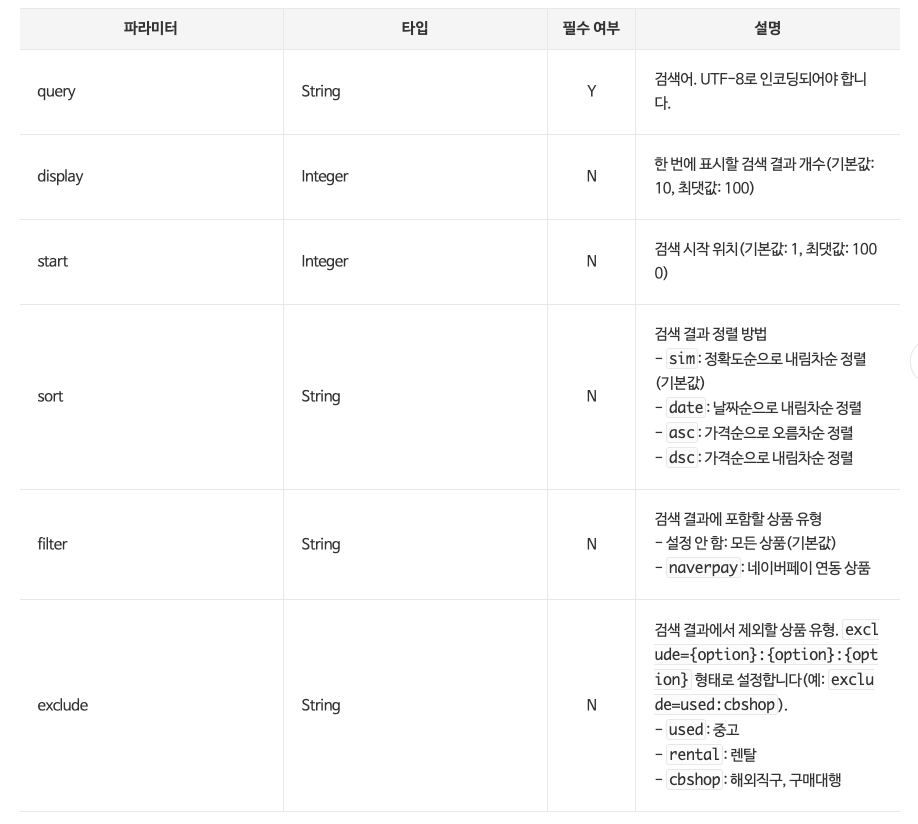

In [18]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [19]:
gen_search_url('shop', 'TEST', 10, 3)

'https://openapi.naver.com/v1/search/shop.json?query=TEST&start=10&display=3'

### 결과 받기(get_result_onpage 함수)

In [20]:
import json
import datetime

def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", naver_client_id)
    request.add_header("X-Naver-Client-Secret", naver_secret_key)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    return json.loads(response.read().decode("utf-8")) 

In [21]:
url = gen_search_url('shop', '몰스킨', 1, 5)
one_result = get_result_onpage(url)

[2024-08-13 15:30:25.492011] Url Request Success


In [22]:
one_result

{'lastBuildDate': 'Tue, 13 Aug 2024 15:30:25 +0900',
 'total': 31608,
 'start': 1,
 'display': 5,
 'items': [{'title': '<b>몰스킨</b> 클래식노트 소프트커버',
   'link': 'https://search.shopping.naver.com/catalog/46242305618',
   'image': 'https://shopping-phinf.pstatic.net/main_4624230/46242305618.20240307141647.jpg',
   'lprice': '19320',
   'hprice': '',
   'mallName': '네이버',
   'productId': '46242305618',
   'productType': '1',
   'brand': '몰스킨',
   'maker': '몰스킨',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '노트/수첩',
   'category4': '노트'},
  {'title': '<b>몰스킨</b> 클래식노트 하드커버',
   'link': 'https://search.shopping.naver.com/catalog/46221773618',
   'image': 'https://shopping-phinf.pstatic.net/main_4622177/46221773618.20240306165408.jpg',
   'lprice': '28800',
   'hprice': '',
   'mallName': '네이버',
   'productId': '46221773618',
   'productType': '1',
   'brand': '몰스킨',
   'maker': '몰스킨',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '노트/수첩',
   'categor

### 결과에서 필드값 조회 후 데이터프레임으로 변환(get_fields 함수)

In [23]:
one_result["items"][0]["title"]

'<b>몰스킨</b> 클래식노트 소프트커버'

In [24]:
import pandas as pd

def get_fields(json_data):
    title = [each["title"] for each in json_data['items']]
    link = [each["link"] for each in json_data['items']]
    lprice = [each["lprice"] for each in json_data['items']]
    mall_name = [each["mallName"] for each in json_data['items']]
    
    result_pd = pd.DataFrame({
        "title" :  title,
        "lprice" : lprice,        
        "link" : link,
        "mall" : mall_name
    }, columns=["title", "lprice", "link", "mall"])
    
    return result_pd

In [25]:
get_fields(one_result)

,title,lprice,link,mall
0,<b>몰스킨</b> 클래식노트 소프트커버,19320,https://search.shopping.naver.com/catalog/4624...,네이버
1,<b>몰스킨</b> 클래식노트 하드커버,28800,https://search.shopping.naver.com/catalog/4622...,네이버
2,<b>몰스킨</b> 년 18개월 위클리 라지 large 다이어리 무료각인 2024-25,40040,https://search.shopping.naver.com/catalog/4775...,네이버
3,<b>몰스킨</b> 클래식 룰드 하드커버 노트 라지,23710,https://search.shopping.naver.com/catalog/3915...,네이버
4,(50%) <b>몰스킨</b> 2024년 데일리 하드커버 라지 다이어리,23400,https://smartstore.naver.com/main/products/916...,펜카페스토어


#### title 에 <b></b> 태그를 제거

In [30]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

In [31]:
import pandas as pd

def get_fields(json_data):
    title = [delete_tag(each["title"]) for each in json_data['items']]
    link = [each["link"] for each in json_data['items']]
    lprice = [each["lprice"] for each in json_data['items']]
    mall_name = [each["mallName"] for each in json_data['items']]
    
    result_pd = pd.DataFrame({
        "title" :  title,
        "lprice" : lprice,        
        "link" : link,
        "mall" : mall_name
    }, columns=["title", "lprice", "link", "mall"])
    
    return result_pd

In [32]:
get_fields(one_result)

,title,lprice,link,mall
0,몰스킨 클래식노트 소프트커버,19320,https://search.shopping.naver.com/catalog/4624...,네이버
1,몰스킨 클래식노트 하드커버,28800,https://search.shopping.naver.com/catalog/4622...,네이버
2,몰스킨 년 18개월 위클리 라지 large 다이어리 무료각인 2024-25,40040,https://search.shopping.naver.com/catalog/4775...,네이버
3,몰스킨 클래식 룰드 하드커버 노트 라지,23710,https://search.shopping.naver.com/catalog/3915...,네이버
4,(50%) 몰스킨 2024년 데일리 하드커버 라지 다이어리,23400,https://smartstore.naver.com/main/products/916...,펜카페스토어


### 전체 데이터 수집
- 위에서는 함수 정의를 위해 5개의 데이터만 수집했지만 전체 데이터를 수집하고 위에서 정의한 함수들을 이용해 데이터 프레임으로 저장한다.

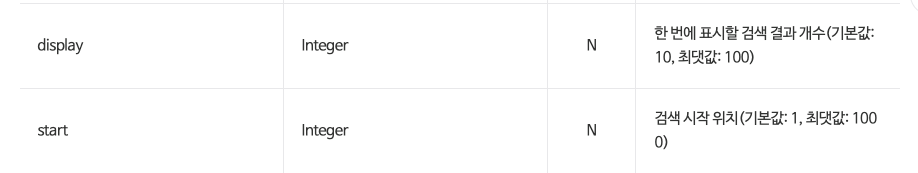

start 파라미터의 최대값이 1000, disp 파라미터의 최대값이 100인 것을 고려하면, 총 1000건의 데이터만 조회 가능

In [40]:
result_mol = []

for n in range(1, 1000, 100):
    url = gen_search_url('shop', '몰스킨', n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields(json_result)
    
    result_mol.append(pd_result)
    
result_mol = pd.concat(result_mol)

[2024-08-13 15:54:11.064961] Url Request Success
[2024-08-13 15:54:11.202498] Url Request Success
[2024-08-13 15:54:11.473517] Url Request Success
[2024-08-13 15:54:11.761076] Url Request Success
[2024-08-13 15:54:12.018678] Url Request Success
[2024-08-13 15:54:12.297270] Url Request Success
[2024-08-13 15:54:12.680354] Url Request Success
[2024-08-13 15:54:12.939911] Url Request Success
[2024-08-13 15:54:13.215154] Url Request Success
[2024-08-13 15:54:13.505632] Url Request Success


#### reset_index

In [41]:
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   link    1000 non-null   object
 3   mall    1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [42]:
result_mol.reset_index(drop=True, inplace=True)
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1000 non-null   object
 1   lprice  1000 non-null   object
 2   link    1000 non-null   object
 3   mall    1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [43]:
result_mol.head()

,title,lprice,link,mall
0,몰스킨 클래식노트 소프트커버,19320,https://search.shopping.naver.com/catalog/4624...,네이버
1,몰스킨 클래식노트 하드커버,28800,https://search.shopping.naver.com/catalog/4622...,네이버
2,몰스킨 년 18개월 위클리 라지 large 다이어리 무료각인 2024-25,40040,https://search.shopping.naver.com/catalog/4775...,네이버
3,몰스킨 클래식 룰드 하드커버 노트 라지,23710,https://search.shopping.naver.com/catalog/3915...,네이버
4,(50%) 몰스킨 2024년 데일리 하드커버 라지 다이어리,23400,https://smartstore.naver.com/main/products/916...,펜카페스토어


#### lprice 자료형 변경 object -> float

In [44]:
result_mol["lprice"] = result_mol["lprice"].astype("float")
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1000 non-null   object 
 1   lprice  1000 non-null   float64
 2   link    1000 non-null   object 
 3   mall    1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


### 엑셀로 저장
```bash
pip install xlsxwriter
```

In [48]:
writer = pd.ExcelWriter("../data/06. molskin_diary_in_naver_shop.xlsx", engine="xlsxwriter")
result_mol.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 10)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 50)
worksheet.set_column("F:F", 10)

worksheet.conditional_format("C2:C1001", {"type": "3_color_scale"}) # 엑셀 함수 적용
writer.save()

#### 결과

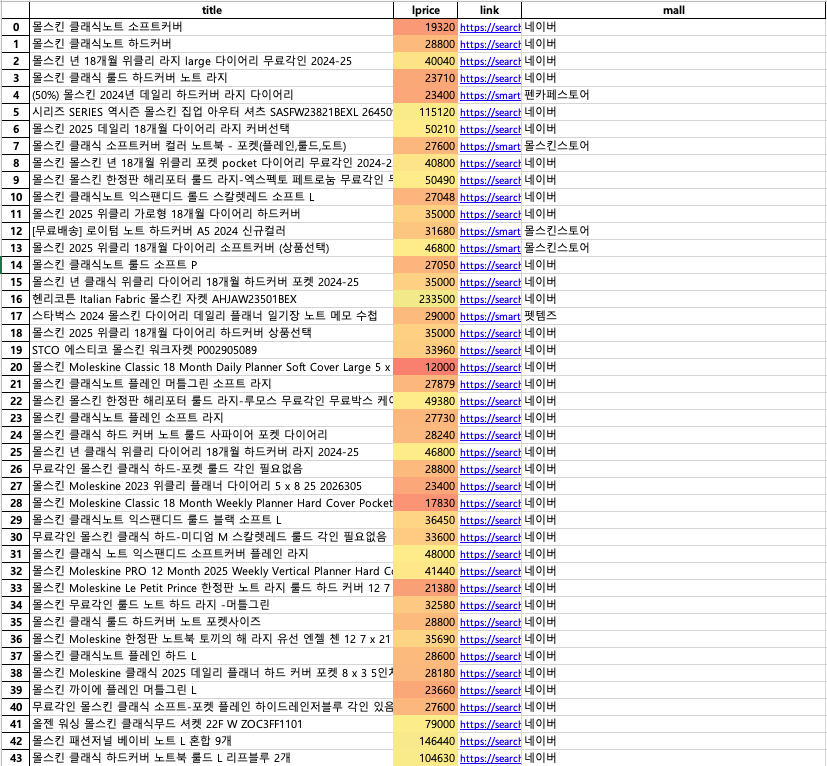

---

## 4. 몰스킨 데이터 시각화

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul

matplotlib hangul settings done in Mac


In [3]:
import pandas as pd

In [6]:
result_mol = pd.read_excel(
    "../data/06. molskin_diary_in_naver_shop.xlsx",
    engine="openpyxl",
    index_col=0
)
result_mol.head()

,title,lprice,link,mall
0,몰스킨 클래식노트 소프트커버,19320,https://search.shopping.naver.com/catalog/4624...,네이버
1,몰스킨 클래식노트 하드커버,28800,https://search.shopping.naver.com/catalog/4622...,네이버
2,몰스킨 년 18개월 위클리 라지 large 다이어리 무료각인 2024-25,40040,https://search.shopping.naver.com/catalog/4775...,네이버
3,몰스킨 클래식 룰드 하드커버 노트 라지,23710,https://search.shopping.naver.com/catalog/3915...,네이버
4,(50%) 몰스킨 2024년 데일리 하드커버 라지 다이어리,23400,https://smartstore.naver.com/main/products/916...,펜카페스토어


### 몰스킨 노트 판매자 시각화

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


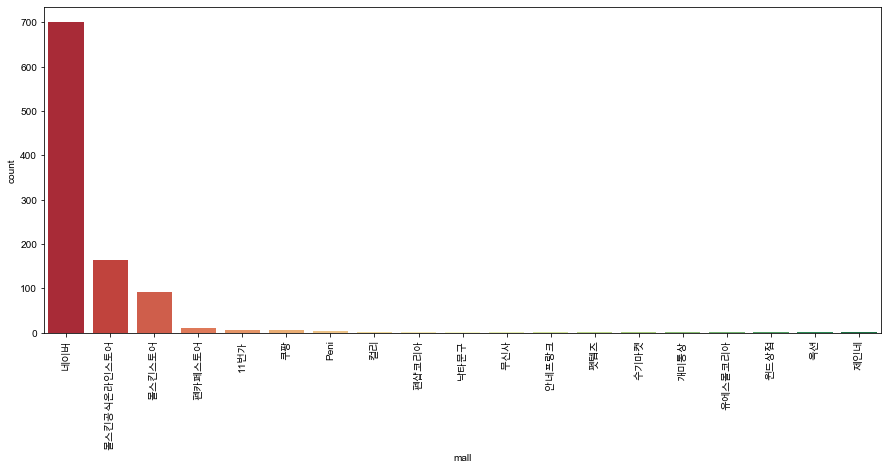

In [9]:
plt.figure(figsize=(15, 6))
sns.countplot(
    result_mol["mall"],
    data = result_mol, 
    palette="RdYlGn",
    order=result_mol["mall"].value_counts().index
)
plt.xticks(rotation=90)
plt.show()